# Prices and Popularity of Products on Amazon

## Python libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [64]:
data = pd.read_csv('..\Amazon-Products.csv')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\user\AppData\Local\Temp\ipykernel_13704\3133791650.py:1: SyntaxWarning: invalid escape sequence '\A'
  data = pd.read_csv('..\Amazon-Products.csv')


,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [65]:
data.shape

(551585, 10)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


## Handling Missing Data

In [67]:
(data.isnull().sum()/len(data))*100

Unnamed: 0         0.000000
name               0.000000
main_category      0.000000
sub_category       0.000000
image              0.000000
link               0.000000
ratings           31.870700
no_of_ratings     31.870700
discount_price    11.088590
actual_price       3.229421
dtype: float64

In [68]:
null_columns = list((((data.isnull().sum()/len(data))*100)[((data.isnull().sum()/len(data))*100) > 0]).index)
null_columns

['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

In [69]:
null_data = data.copy()

In [70]:
null_data.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [71]:
for i in null_data.columns:
    percentage_unique_values = (len(null_data[i].unique())/len(null_data))*100
    print(f'Column {i}: {round(percentage_unique_values,4)} % unique values')
    print('---------------------------')

Column Unnamed: 0: 3.4809 % unique values
---------------------------
Column name: 71.8312 % unique values
---------------------------
Column main_category: 0.0036 % unique values
---------------------------
Column sub_category: 0.0203 % unique values
---------------------------
Column image: 83.8337 % unique values
---------------------------
Column link: 100.0 % unique values
---------------------------
Column ratings: 0.0091 % unique values
---------------------------
Column no_of_ratings: 1.5126 % unique values
---------------------------
Column discount_price: 4.9878 % unique values
---------------------------
Column actual_price: 4.2008 % unique values
---------------------------


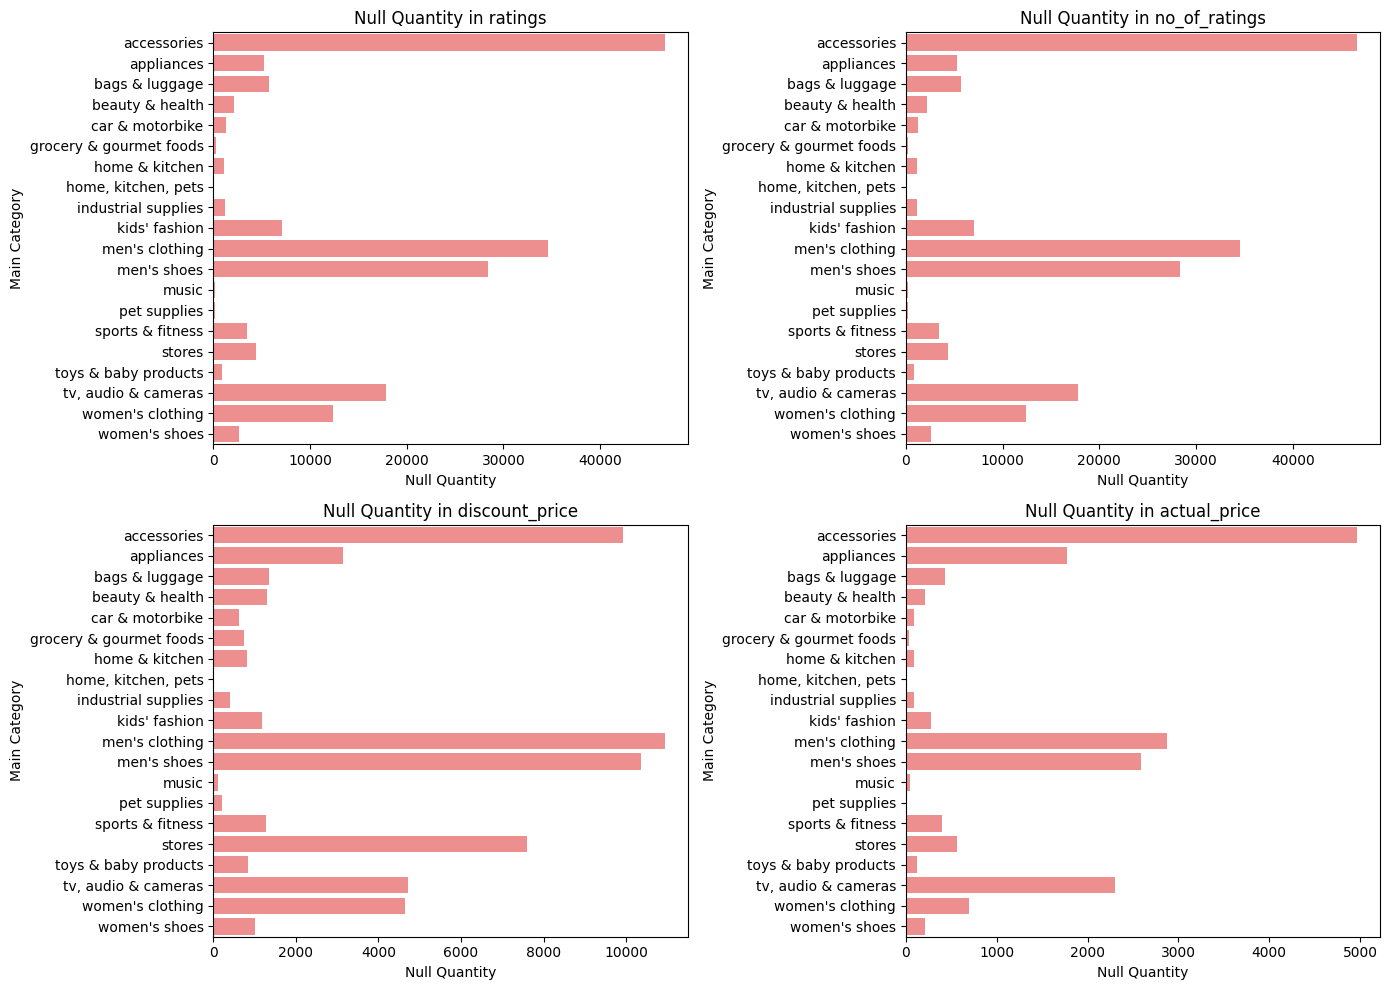

In [72]:
# Configuration of the grid for the plots (2x2)
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))

# Iterate over the null columns and plot them
for idx, col in enumerate(null_columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    
    # Calculate the number of null values by category
    null_counts_byCategory = null_data.groupby('main_category')[col].apply(lambda x: x.isnull().sum())
    df_null_byCategory = pd.DataFrame(null_counts_byCategory).rename(columns={col: 'Null Quantity'})
    
    # Create the bar plot
    sns.barplot(data=df_null_byCategory, y=df_null_byCategory.index, x='Null Quantity', alpha=0.5, color='r', ax=ax)
    ax.set_title(f'Null Quantity in {col}')
    ax.set_xlabel('Null Quantity')
    ax.set_ylabel('Main Category')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

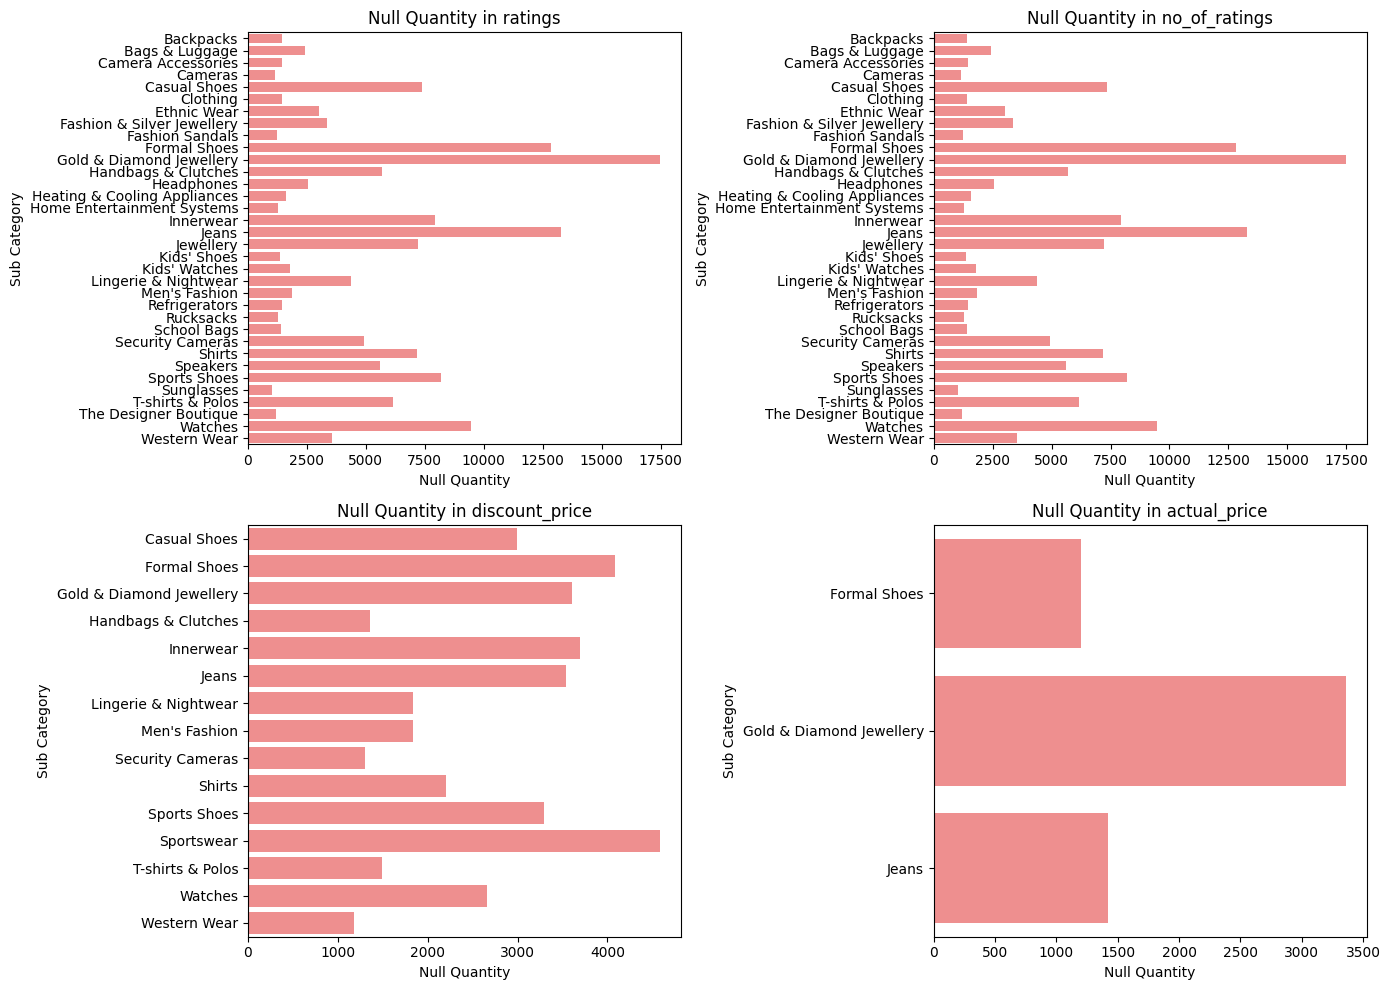

In [73]:
# Configuration of the grid for the plots (2x2)
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))

# Iterate over the null columns and plot them
for idx, col in enumerate(null_columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    
    # Calculate the number of null values by category
    null_counts_SubCategory = null_data.groupby('sub_category')[col].apply(lambda x: x.isnull().sum())
    df_nullSubCategory = pd.DataFrame(null_counts_SubCategory).rename(columns={col: 'Null Quantity'})
    df_nullSubCategory_filltered = df_nullSubCategory[df_nullSubCategory['Null Quantity'] > 1000]
    
    # Create the bar plot
    sns.barplot(data=df_nullSubCategory_filltered, y=df_nullSubCategory_filltered.index, x='Null Quantity', alpha=0.5, color='r', ax=ax)
    ax.set_title(f'Null Quantity in {col}')
    ax.set_xlabel('Null Quantity')
    ax.set_ylabel('Sub Category')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

## Dropping Missing Data 

In [74]:
cleaned_data = null_data.copy()

In [75]:
cleaned_data.dropna(inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340680 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      340680 non-null  int64 
 1   name            340680 non-null  object
 2   main_category   340680 non-null  object
 3   sub_category    340680 non-null  object
 4   image           340680 non-null  object
 5   link            340680 non-null  object
 6   ratings         340680 non-null  object
 7   no_of_ratings   340680 non-null  object
 8   discount_price  340680 non-null  object
 9   actual_price    340680 non-null  object
dtypes: int64(1), object(9)
memory usage: 28.6+ MB


In [76]:
cleaned_data.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"


## Handling Numeric Columns with Object Dtype

In [77]:
transforming_to_numeric = cleaned_data.copy()

In [78]:
numeric_columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

In [79]:
# Convert the specified columns to numeric, handling errors by coercing invalid parsing to NaN
for col in numeric_columns:
    transforming_to_numeric[col] = pd.to_numeric(transforming_to_numeric[col], errors='coerce')

transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340680 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      340680 non-null  int64  
 1   name            340680 non-null  object 
 2   main_category   340680 non-null  object 
 3   sub_category    340680 non-null  object 
 4   image           340680 non-null  object 
 5   link            340680 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   307518 non-null  float64
 8   discount_price  0 non-null       float64
 9   actual_price    0 non-null       float64
dtypes: float64(4), int64(1), object(5)
memory usage: 28.6+ MB


In [80]:
cleaned_data.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"


In [81]:
first_2_numeric_columns = ['ratings', 'no_of_ratings']
for col in first_2_numeric_columns:
    # Convert the column to numeric, coercing errors to NaN
    numeric_values = pd.to_numeric(cleaned_data[col], errors='coerce')
    
    # Select non-numeric values
    non_numeric_values = cleaned_data[col][numeric_values.isnull()]
    
    # Print non-numeric values
    print(f"The column {col} has the following non-numeric values:")
    print(non_numeric_values.unique())

The column ratings has the following non-numeric values:
['Get' 'FREE' '₹65' '₹70' '₹100' '₹99' '₹2.99']
The column no_of_ratings has the following non-numeric values:
['2,255' '2,948' '1,206' ... '55,051' '3,329' '7,141']


In [82]:
# List of non-numeric values
ratings_no_numeric_values = ['Get', 'FREE', '₹65', '₹70', '₹100', '₹99', '₹2.99']

# Filter the "ratings" column to select only values in ratings_no_numeric_values
filtered_ratings = cleaned_data[cleaned_data['ratings'].isin(ratings_no_numeric_values)]

# Count how many times each value appears and calculate percentage
percenatage_value_counts = ((filtered_ratings['ratings'].value_counts()) / len(cleaned_data)) * 100

# Print the result
print("Percentage of each value from 'ratings_no_numeric_values' in the 'ratings' column:")
print(percenatage_value_counts)

Percentage of each value from 'ratings_no_numeric_values' in the 'ratings' column:
ratings
Get      1.279500
FREE     0.391863
₹99      0.004109
₹70      0.001468
₹2.99    0.000587
₹65      0.000294
₹100     0.000294
Name: count, dtype: float64


In [83]:
transforming_to_numeric = cleaned_data.copy()

In [84]:
transforming_to_numeric = transforming_to_numeric[~transforming_to_numeric['ratings'].isin(ratings_no_numeric_values)]
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      334963 non-null  int64 
 1   name            334963 non-null  object
 2   main_category   334963 non-null  object
 3   sub_category    334963 non-null  object
 4   image           334963 non-null  object
 5   link            334963 non-null  object
 6   ratings         334963 non-null  object
 7   no_of_ratings   334963 non-null  object
 8   discount_price  334963 non-null  object
 9   actual_price    334963 non-null  object
dtypes: int64(1), object(9)
memory usage: 28.1+ MB


In [85]:
transforming_to_numeric['ratings'] = pd.to_numeric(transforming_to_numeric['ratings'], errors='coerce')
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      334963 non-null  int64  
 1   name            334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  object 
 8   discount_price  334963 non-null  object 
 9   actual_price    334963 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 28.1+ MB


In [86]:
# Attempt to convert each value to a numeric type
non_numeric_values = transforming_to_numeric['no_of_ratings'].apply(pd.to_numeric, errors='coerce')

# Select values that couldn't be converted correctly
text_values = transforming_to_numeric['no_of_ratings'][non_numeric_values.isnull()]

# Print the values that are truly text or object
print("Text or object values in 'no_of_ratings' column:")
print(text_values.unique())

Text or object values in 'no_of_ratings' column:
['2,255' '2,948' '1,206' ... '55,051' '3,329' '7,141']


In [87]:
transforming_to_numeric["no_of_ratings"] = transforming_to_numeric["no_of_ratings"].str.replace(',', '').astype(float)
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      334963 non-null  int64  
 1   name            334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  334963 non-null  object 
 9   actual_price    334963 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 28.1+ MB


In [88]:
# Removing the ₹ sign
transforming_to_numeric["discount_price"] = transforming_to_numeric["discount_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)
transforming_to_numeric["actual_price"] = transforming_to_numeric["actual_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)

In [89]:
# Change commas to dots and change the type to float
transforming_to_numeric['discount_price'] = transforming_to_numeric["discount_price"].str.replace(',', '').astype(float)
transforming_to_numeric["actual_price"] = transforming_to_numeric["actual_price"].str.replace(',', '').astype(float)

In [90]:
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      334963 non-null  int64  
 1   name            334963 non-null  object 
 2   main_category   334963 non-null  object 
 3   sub_category    334963 non-null  object 
 4   image           334963 non-null  object 
 5   link            334963 non-null  object 
 6   ratings         334963 non-null  float64
 7   no_of_ratings   334963 non-null  float64
 8   discount_price  334963 non-null  float64
 9   actual_price    334963 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 28.1+ MB


## Exploratory Data Analisys

In [91]:
df = transforming_to_numeric.copy()

In [92]:
df['name'][0:10]

0    Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...
1    LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...
2    LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...
3    LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...
4    Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...
5    Voltas 1.4 Ton 3 Star Inverter Split AC(Copper...
6    Lloyd 1.0 Ton 3 Star Inverter Split Ac (5 In 1...
7    Lloyd 1.5 Ton 5 Star Inverter Split Ac (5 In 1...
8    Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...
9    Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...
Name: name, dtype: object

In [93]:
# Function to extract manufacturer
def extract_manufacturer(name):
    words = name.split(' ')
    if words[0] in ['The', 'Var']:
        return ' '.join(words[:2])
    return words[0]

# Apply the function to create the manufacturer column
df['manufacturer'] = df['name'].apply(extract_manufacturer)
df.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,Lloyd
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,LG
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,LG


In [94]:
print(f'Number of Manufacturer companies: {len(df['manufacturer'].unique())}')

Number of Manufacturer companies: 38009


In [95]:
# Make column with discount net value
df['discount_value'] = df['actual_price'] - df['discount_price']

In [96]:
# Make column with discount and discounting percent 
df['discounting_percent'] = 1 - df['discount_price']/df['actual_price']

In [97]:
df.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_value,discounting_percent
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,Lloyd,25991.0,0.440600
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,LG,29500.0,0.388209
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,LG,27500.0,0.443620


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334963 entries, 0 to 551584
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           334963 non-null  int64  
 1   name                 334963 non-null  object 
 2   main_category        334963 non-null  object 
 3   sub_category         334963 non-null  object 
 4   image                334963 non-null  object 
 5   link                 334963 non-null  object 
 6   ratings              334963 non-null  float64
 7   no_of_ratings        334963 non-null  float64
 8   discount_price       334963 non-null  float64
 9   actual_price         334963 non-null  float64
 10  manufacturer         334963 non-null  object 
 11  discount_value       334963 non-null  float64
 12  discounting_percent  334963 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 35.8+ MB


In [99]:
df[["actual_price", 'manufacturer']].groupby("manufacturer").mean().round(2).sort_values(by = "actual_price", ascending = False)

,actual_price
manufacturer,
Marutivilla,4.950001e+09
DENON,2.129000e+05
IMALENT,1.900000e+05
XGIMI,1.899077e+05
Mijia,1.849990e+05
...,...
Too,2.000000e+01
"Sprite,",2.000000e+01
Bingo!,1.000000e+01


In [100]:
# Let us check the manufactures according to their prices
df.groupby("manufacturer")['actual_price'].mean().sort_values( ascending = False)

manufacturer
Marutivilla    4.950001e+09
DENON          2.129000e+05
IMALENT        1.900000e+05
XGIMI          1.899077e+05
Mijia          1.849990e+05
                   ...     
Too            2.000000e+01
Sprite,        2.000000e+01
Bingo!         1.000000e+01
Kurkure        1.000000e+01
BRU            1.000000e+01
Name: actual_price, Length: 38009, dtype: float64

In [101]:
# Detail of the maximum price row
df[df["actual_price"] == df["actual_price"].max()]

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_value,discounting_percent
194625,853,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Marutivilla-Mosquito-Suc...,2.0,1.0,589.0,9.900000e+09,Marutivilla,9.899999e+09,1.0


In [102]:
# Detail of the minimum price row
df[df["discount_value"] == df["discount_value"].min()]

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_value,discounting_percent
436321,610,Mochi Women Gold Synthetic Sandals (44-9937MY),women's shoes,Shoes,https://m.media-amazon.com/images/I/71OTpX0i59...,https://www.amazon.in/Mochi-Womens-Fashion-San...,3.6,28.0,1889.99,1890.0,Mochi,0.01,0.000005
499918,580,GKFML Fiber Glass 30 METRE FIBER PLASTIKA MEAS...,industrial supplies,"Test, Measure & Inspect",https://m.media-amazon.com/images/I/41kdufmMNA...,https://www.amazon.in/GKFML-Fiber-Glass-PLASTI...,3.3,8.0,589.99,590.0,GKFML,0.01,0.000017


In [103]:
# Replace 'Van' with 'Van Heusen' in the 'manufacturer' column
df['manufacturer'] = df['manufacturer'].replace('Van', 'Van Heusen')

In [104]:
# Let us check the common manufacture
values = df["manufacturer"].value_counts().keys().tolist()[:10]
counts = df["manufacturer"].value_counts().tolist()[:10]

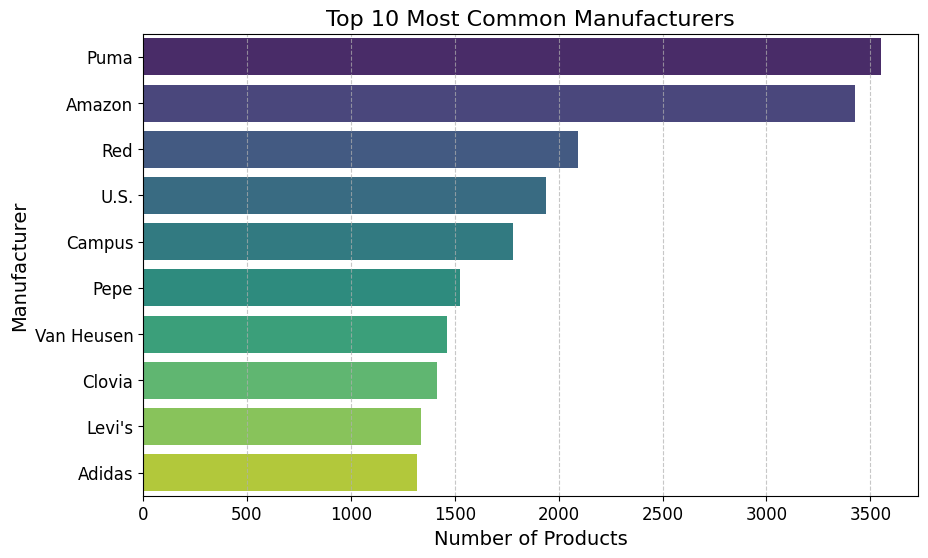

In [105]:
# Let us check the common manufacturers
top_n = 10
manufacturer_counts = df['manufacturer'].value_counts().head(top_n)
values = manufacturer_counts.index
counts = manufacturer_counts.values

plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=values, hue= values, palette="viridis")

# Adding labels and title
plt.title('Top 10 Most Common Manufacturers', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### ***Insight #1***
From above graph we see that the Puma is most popular. Let us check the main category for the above top 10 brands

In [106]:
# Creating the dataframe of top 10 manufacturer
# Get the top 10 manufacturers
top_10_manufacturers = df['manufacturer'].value_counts().index[:10]

# Creating the DataFrame of top 10 manufacturers
df_top_10_manufacturers = df[df['manufacturer'].isin(top_10_manufacturers)]
df_top_10_manufacturers.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_value,discounting_percent
65,65,"Amazon Basics 1 Ton, 5 Star, Wi-Fi Enabled Sma...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51s3yrWntM...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.6,88.0,28990.0,49089.0,Amazon,20099.0,0.409440
83,83,"Amazon Basics 1.5 Ton, 5 Star, Wi-Fi Enabled S...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51s3yrWntM...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.4,39.0,34990.0,56179.0,Amazon,21189.0,0.377169
112,112,Amazon Basics 1 Ton 4 Star Fixed Speed Window ...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/91BcgKPL5x...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.5,14.0,25490.0,33990.0,Amazon,8500.0,0.250074


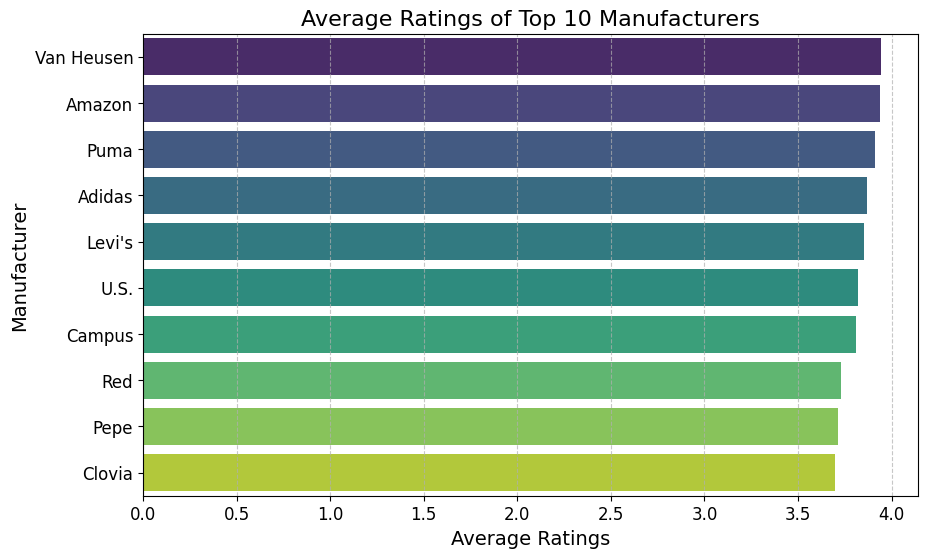

In [107]:
# Average rating of the manufactures

# Calculate the mean ratings for each manufacturer and sort them
mean_ratings = df_top_10_manufacturers.groupby("manufacturer")["ratings"].mean().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
mean_ratings = mean_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="ratings", y="manufacturer", data=mean_ratings ,hue='manufacturer', palette="viridis")

# Add labels and title
plt.title('Average Ratings of Top 10 Manufacturers', fontsize=16)
plt.xlabel('Average Ratings', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

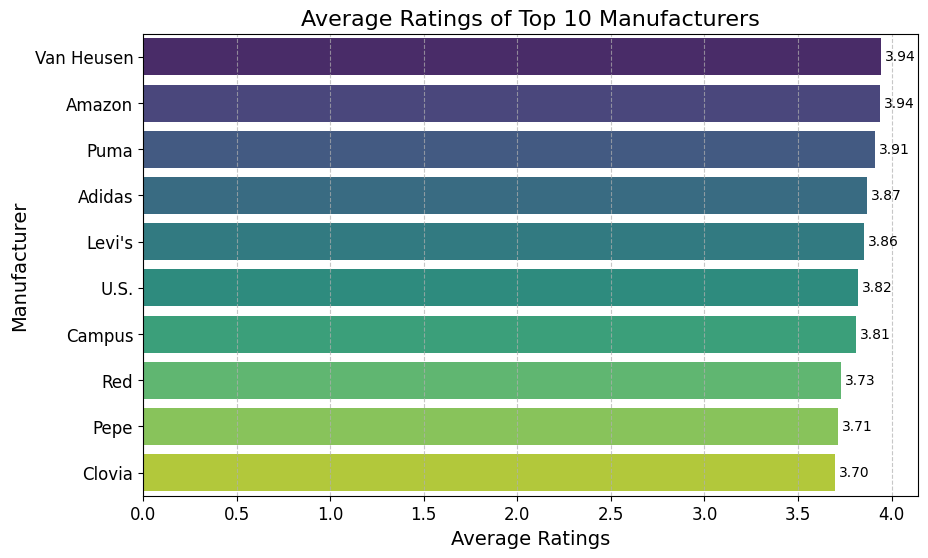

In [108]:
# Creating the DataFrame of top 10 manufacturers
df_top_10_manufacturers = df[df['manufacturer'].isin(top_10_manufacturers)]

# Calculate the mean ratings for each manufacturer and sort them
mean_ratings = df_top_10_manufacturers.groupby("manufacturer")["ratings"].mean().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
mean_ratings = mean_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10,6))
barplot = sns.barplot(x="ratings", y="manufacturer", data=mean_ratings, hue = 'manufacturer', palette="viridis")

# Add the value labels on the bars with a slight offset
for index, value in enumerate(mean_ratings["ratings"]):
    plt.text(value + 0.02, index, f'{value:.2f}', color='black', ha="left", va="center")

# Add labels and title
plt.title('Average Ratings of Top 10 Manufacturers', fontsize=16)
plt.xlabel('Average Ratings', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### ***Insight #2***
Even though the most popular brand is Puma but the highest rated is Amazon.
Also the manufacturer Amazon is second most favourite in the popular manufacturer category. On the other hand Puma is second in terms of average rating
Let us now check the popular main category items present.

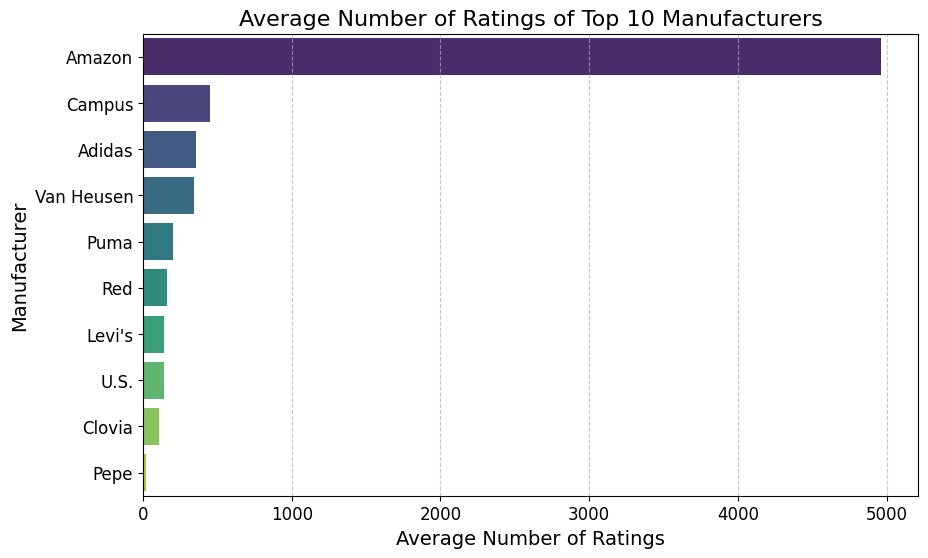

In [109]:
# Calculate the mean number of ratings for each manufacturer and sort them
mean_no_of_ratings = df_top_10_manufacturers.groupby("manufacturer")["no_of_ratings"].mean().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
mean_no_of_ratings = mean_no_of_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="no_of_ratings", y="manufacturer", data=mean_no_of_ratings, hue='manufacturer', palette="viridis")

# Add labels and title
plt.title('Average Number of Ratings of Top 10 Manufacturers', fontsize=16)
plt.xlabel('Average Number of Ratings', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### ***Insight #3***
Aqui se observa que el fabricante que cuenta con mayor numero de revisiones es Amazon, con un aproximado de 5000 ratings en sus productos. 

In [110]:
df_amazon = df[df['manufacturer'] == 'Amazon']
df_amazon.shape

(3424, 13)

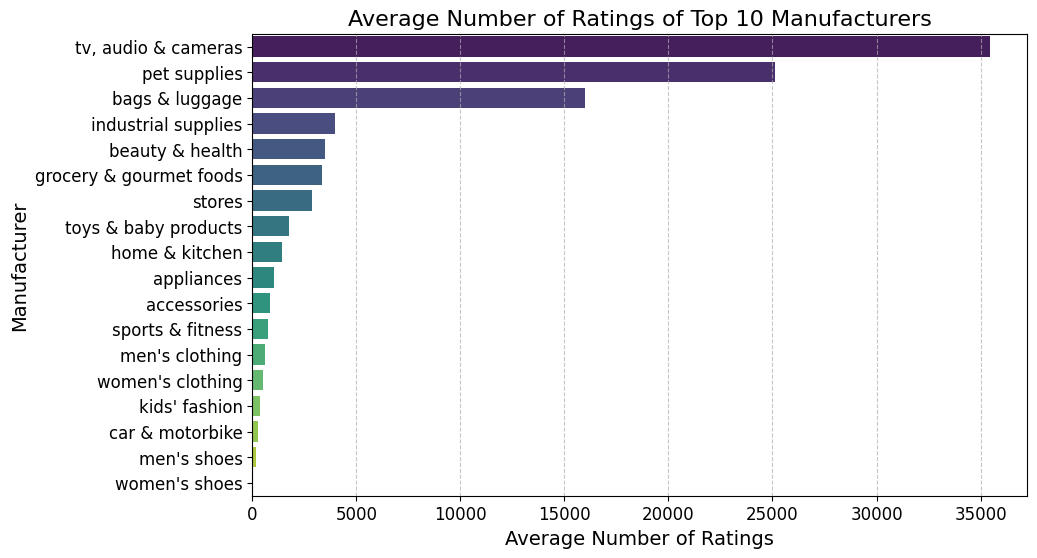

In [111]:
# Calculate the mean number of ratings for each manufacturer and sort them
mean_no_of_ratings = df_amazon.groupby("main_category")["no_of_ratings"].mean().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
mean_no_of_ratings = mean_no_of_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="no_of_ratings", y="main_category", data=mean_no_of_ratings, hue='main_category', palette="viridis")

# Add labels and title
plt.title('Average Number of Ratings of Top 10 Manufacturers', fontsize=16)
plt.xlabel('Average Number of Ratings', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [112]:
df_amazon_tv_audio_cameras = df_amazon[df_amazon['main_category'] == 'tv, audio & cameras']
df_amazon_tv_audio_cameras.shape

(393, 13)

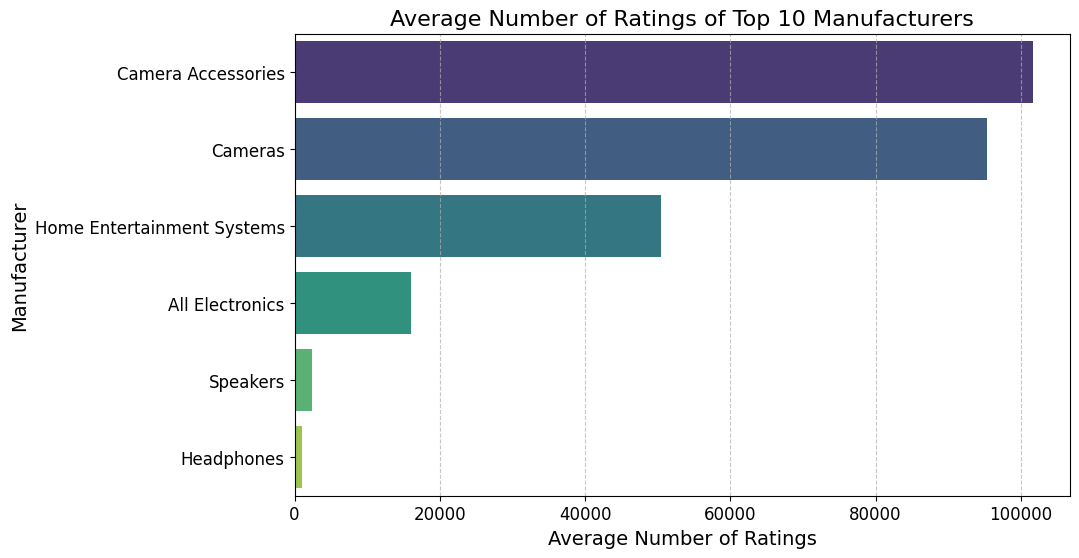

In [113]:
# Calculate the mean number of ratings for each manufacturer and sort them
mean_no_of_ratings = df_amazon_tv_audio_cameras.groupby("sub_category")["no_of_ratings"].mean().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
mean_no_of_ratings = mean_no_of_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="no_of_ratings", y="sub_category", data=mean_no_of_ratings, hue='sub_category', palette="viridis")

# Add labels and title
plt.title('Average Number of Ratings of Top 10 Manufacturers', fontsize=16)
plt.xlabel('Average Number of Ratings', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [114]:
df_amazon['no_of_ratings'].max()

437652.0

In [115]:
df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price',
       'manufacturer', 'discount_value', 'discounting_percent'],
      dtype='object')

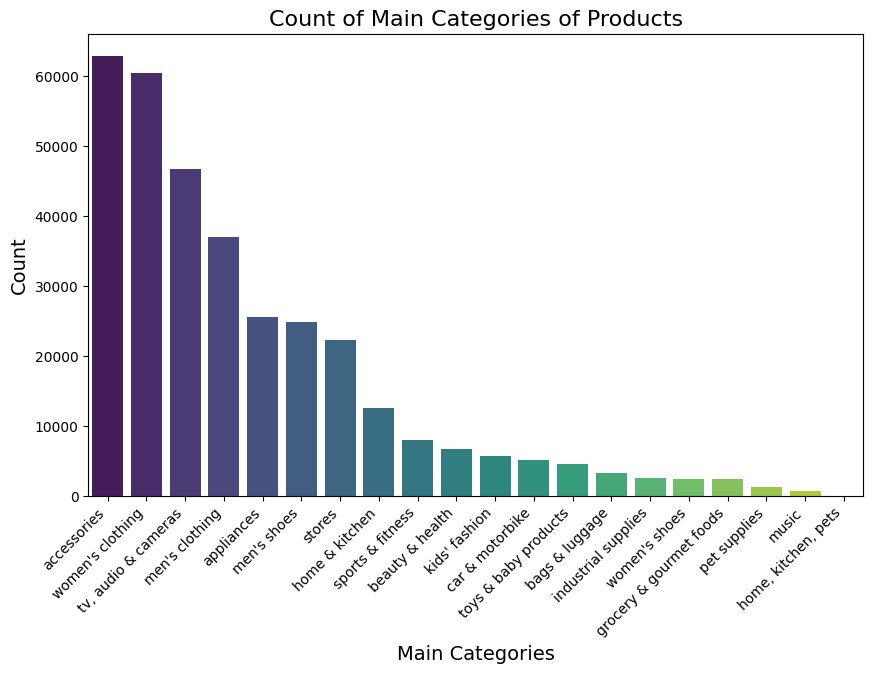

In [116]:
# Ordena las categorías por recuento descendente
order = df["main_category"].value_counts().index

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="main_category", order=order, hue='main_category', palette='viridis', hue_order=order )

# Add labels and title
plt.xlabel("Main Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of Main Categories of Products", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()